In [1]:
import pandas as pd
import numpy as np

### Dataset 1 - Tuition fee by State 

#### Getting Dataset Name

In [2]:
tuition_fee_by_state_data = pd.read_csv('tuitionfeebystate.csv')
table_name = tuition_fee_by_state_data.columns[0]

In [3]:
tuition_fee_by_state_data = pd.read_csv('tuitionfeebystate.csv',header=1)
table_sub_name1 = tuition_fee_by_state_data.columns[1]
table_sub_name2 = tuition_fee_by_state_data.columns[17]

In [4]:
tuition_fee_by_state_data = pd.read_csv('tuitionfeebystate.csv',header=2, usecols=range(0,17))
#tuition_fee_by_state_data.columns[0]='States'
#tuition_fee_by_state_data

In [5]:
table_sub_name1

'Public Two-Year In-District Tuition and Fees'

In [6]:
datelst=[0]
for x in range(2004,2018):
    datelst.append(x)
datelst.append('1-Year % Change')
datelst.append('5-Year % Change')

In [7]:
tuition_two_year_data = pd.read_csv('tuitionfeebystate.csv',header=2, usecols=range(0,17))
tuition_two_year_data.columns = ['States', 
                                     datelst[1],
                                     datelst[2],
                                     datelst[3],
                                     datelst[4],
                                     datelst[5],
                                     datelst[6],
                                     datelst[7],
                                     datelst[8],
                                     datelst[9],
                                     datelst[10],
                                     datelst[11],
                                     datelst[12],
                                     datelst[13],
                                     datelst[14],
                                     tuition_two_year_data.columns[15],
                                     tuition_two_year_data.columns[16],
                                    ]
tuition_two_year_data.name = table_sub_name1
tuition_two_year_data.drop(axis=0,index=0).head()

,States,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,1-Year % Change,5-Year % Change
1,Alabama,"$3,526","$3,420","$3,351","$3,301","$3,155","$3,227","$3,837","$4,345","$4,368","$4,350","$4,373","$4,425","$4,470","$4,487",0%,3%
2,Arkansas,"$2,422","$2,480","$2,520","$2,513","$2,555","$2,703","$2,835","$2,885","$2,985","$3,150","$3,264","$3,490","$3,593","$3,645",1%,22%
3,Arizona,"$1,800","$1,907","$1,997","$1,981","$2,026","$2,180","$2,222","$2,331","$2,355","$2,445","$2,497","$2,538","$2,603","$2,606",0%,11%
4,California,"$1,044","$1,015",$871,$744,$706,$929,$920,"$1,212","$1,516","$1,493","$1,467","$1,459","$1,450","$1,430",-1%,-6%
5,Colorado,"$2,867","$2,992","$2,858","$2,890","$2,838","$3,146","$3,505","$3,677","$3,822","$3,924","$4,007","$4,182","$4,339","$4,458",3%,17%


#### Convert 2 year and 4 year dataframes to numeric values for columns that can be changed

In [8]:
lst =[0]
[lst.append(x) for x in range(18,34)]
tuition_four_year_data = pd.read_csv('tuitionfeebystate.csv',header=2, usecols=lst)
tuition_four_year_data.columns = ['States', 
                                     datelst[1],
                                     datelst[2],
                                     datelst[3],
                                     datelst[4],
                                     datelst[5],
                                     datelst[6],
                                     datelst[7],
                                     datelst[8],
                                     datelst[9],
                                     datelst[10],
                                     datelst[11],
                                     datelst[12],
                                     datelst[13],
                                     datelst[14],
                                     tuition_four_year_data.columns[15][:-2],
                                     tuition_four_year_data.columns[16][:-2],
                                    ]
tuition_four_year_data.name = table_sub_name2
tuition_four_year_data.drop(axis=0,index=0).head()

,States,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,1-Year % Change,5-Year % Change
1,Alabama,"$5,829","$5,991","$5,901","$6,163","$6,641","$7,374","$8,279","$8,669","$9,332","$9,599","$9,740","$9,996","$10,256","$10,530",3%,13%
2,Arkansas,"$5,921","$6,239","$6,392","$6,580","$6,581","$6,797","$7,078","$7,210","$7,474","$7,599","$7,802","$8,085","$8,396","$8,553",2%,14%
3,Arizona,"$5,271","$5,555","$5,622","$5,828","$6,214","$7,450","$9,067","$10,223","$10,394","$10,561","$10,681","$10,907","$11,119","$11,218",1%,8%
4,California,"$5,422","$5,670","$5,472","$5,818","$6,049","$7,445","$8,404","$9,679","$9,601","$9,512","$9,423","$9,505","$9,462","$9,680",2%,1%
5,Colorado,"$4,825","$5,546","$5,740","$6,387","$6,446","$7,127","$7,947","$8,529","$9,019","$9,532","$9,538","$9,999","$10,464","$10,797",3%,20%


#### Some clever iterrows that uses the current index to rewrite values so that we may convert them to numeric

In [9]:
tuition_two_year_data.rename(index=tuition_two_year_data['States'], inplace=True)
tuition_two_year_data
for index,row in tuition_two_year_data.iterrows():
    tuition_two_year_data.loc[index] = row.str.replace('$','').str.replace(',','').str.replace('%','')
cols = tuition_two_year_data.columns.drop(labels='States')
tuition_two_year_data[cols] = tuition_two_year_data[cols].apply(pd.to_numeric, errors='coerce').fillna(0)
tuition_two_year_data = tuition_two_year_data.drop(['States'],axis=1)
tuition_two_year_data.head()

/tmp/ipykernel_11150/2119730133.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  tuition_two_year_data.loc[index] = row.str.replace('$','').str.replace(',','').str.replace('%','')


,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,1-Year % Change,5-Year % Change
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alabama,3526.0,3420.0,3351.0,3301.0,3155.0,3227.0,3837.0,4345.0,4368.0,4350.0,4373.0,4425.0,4470.0,4487.0,0.0,3.0
Arkansas,2422.0,2480.0,2520.0,2513.0,2555.0,2703.0,2835.0,2885.0,2985.0,3150.0,3264.0,3490.0,3593.0,3645.0,1.0,22.0
Arizona,1800.0,1907.0,1997.0,1981.0,2026.0,2180.0,2222.0,2331.0,2355.0,2445.0,2497.0,2538.0,2603.0,2606.0,0.0,11.0
California,1044.0,1015.0,871.0,744.0,706.0,929.0,920.0,1212.0,1516.0,1493.0,1467.0,1459.0,1450.0,1430.0,-1.0,-6.0


#### Same thing for the tuition four year values:

In [10]:
for index,row in tuition_four_year_data.iterrows():
    tuition_four_year_data.loc[index] = row.str.replace('$','').str.replace(',','').str.replace('%','')
cols = tuition_four_year_data.columns.drop(labels='States')
tuition_four_year_data[cols] = tuition_four_year_data[cols].apply(pd.to_numeric, errors='coerce').fillna(0)
tuition_four_year_data.head()

/tmp/ipykernel_11150/174958926.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  tuition_four_year_data.loc[index] = row.str.replace('$','').str.replace(',','').str.replace('%','')


,States,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,1-Year % Change,5-Year % Change
0,Alaska,4439,4752,5045,5200,5206,5595,5907,5910,6181,6167,6307,6876,7250,7438,3,20
1,Alabama,5829,5991,5901,6163,6641,7374,8279,8669,9332,9599,9740,9996,10256,10530,3,13
2,Arkansas,5921,6239,6392,6580,6581,6797,7078,7210,7474,7599,7802,8085,8396,8553,2,14
3,Arizona,5271,5555,5622,5828,6214,7450,9067,10223,10394,10561,10681,10907,11119,11218,1,8
4,California,5422,5670,5472,5818,6049,7445,8404,9679,9601,9512,9423,9505,9462,9680,2,1


<AxesSubplot:>

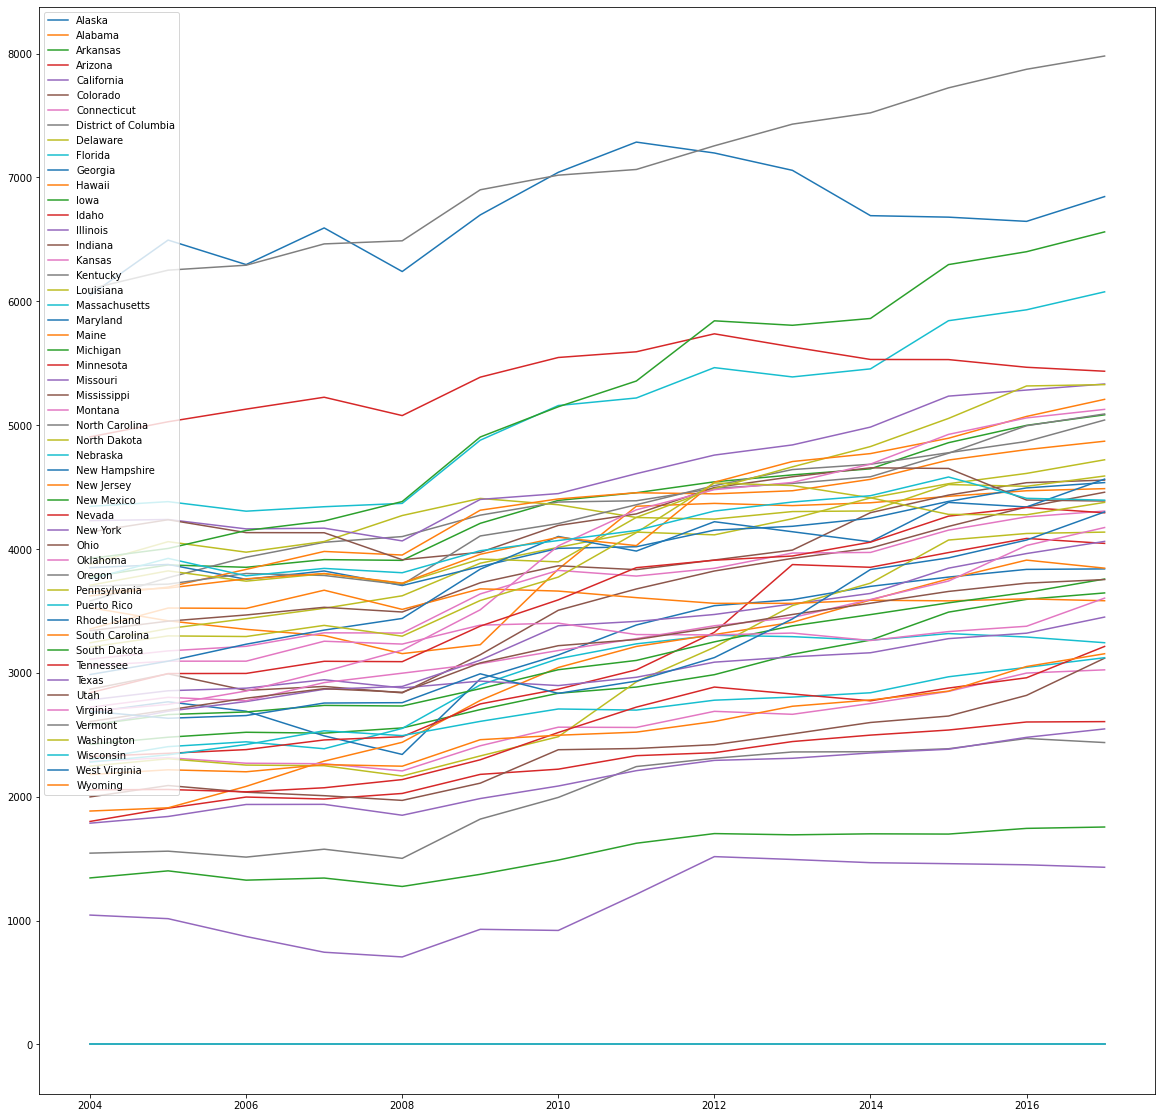

In [17]:
tuition_yoy = tuition_two_year_data.drop(['1-Year % Change','5-Year % Change'], axis=1)
tuition_yoy.T.plot(kind='line',figsize=(20,20))

___

### Dataset 2 - Unemployment Data

In [ ]:
unemployment_data = pd.read_csv('unemploymentdata.csv')

### Dataset 3 - Untidy.csv

In [ ]:
untidy_data = pd.read_csv('untidy.csv')